<a href="https://colab.research.google.com/github/Yassmina-Abdo/dry-beans-classification/blob/main/Notebooks/trial3_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dry Beans Competition
Notebook : Feature Extraction for Dry beans competition version 2

Auther : Fatema Samir 

Date : 4/5/2022



# **Import Library**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from matplotlib.colors import ListedColormap
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read Data 

In [ ]:
# Define pathes
# path_origin_Data
path_oversample_Data = '/content/drive/MyDrive/Dry Beans Classification Competition/Dataset/Preprocessing/trainvalid_oversample.csv'
# Path_trail1_train  = '/content/drive/MyDrive/Dry Beans Classification Competition/Dataset/Preprocessing/trial1_train.csv'
# Path_trail2_train 
# Path_trail3_train 
# Path_trail4_train 
# Path_trail5_train 

# Path_trail1_val = '/content/drive/MyDrive/Dry Beans Classification Competition/Dataset/Preprocessing/Validation/trial_1_test.csv'
# Path_trail2_val
# Path_trail3_val
# Path_trail4_val
# Path_trail5_val

In [ ]:
# Read Data
All_Data = pd.read_csv(path_oversample_Data)
# suffle Data 
All_Data = shuffle(All_Data)
print(All_Data.shape)

(21000, 18)


In [ ]:
All_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 19095 to 12603
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               21000 non-null  int64  
 1   Area             21000 non-null  int64  
 2   Perimeter        21000 non-null  float64
 3   MajorAxisLength  21000 non-null  float64
 4   MinorAxisLength  21000 non-null  float64
 5   AspectRation     21000 non-null  float64
 6   Eccentricity     21000 non-null  float64
 7   ConvexArea       21000 non-null  float64
 8   EquivDiameter    21000 non-null  float64
 9   Extent           21000 non-null  float64
 10  Solidity         21000 non-null  float64
 11  roundness        21000 non-null  float64
 12  Compactness      21000 non-null  float64
 13  ShapeFactor1     21000 non-null  float64
 14  ShapeFactor2     21000 non-null  float64
 15  ShapeFactor3     21000 non-null  float64
 16  ShapeFactor4     21000 non-null  float64
 17  y       

In [ ]:
All_Data.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
19095,19095,35631,685.272578,239.618367,189.543522,1.265132,0.609142,35942.101228,212.996408,0.756813,0.991360,0.953820,0.889218,0.006725,0.002595,0.790995,0.999251,6
3438,3438,32942,674.930000,247.096035,169.976520,1.453707,0.725809,33368.000000,204.800042,0.778550,0.987233,0.908746,0.828828,0.007501,0.002183,0.686955,0.998632,4
19964,19964,34347,673.864587,237.250305,184.502489,1.286252,0.627569,34639.233858,209.122664,0.782896,0.991571,0.950561,0.881570,0.006907,0.002574,0.777279,0.999206,6
6786,6786,57737,942.475000,382.127223,194.300587,1.966681,0.861079,58667.000000,271.132867,0.779229,0.984148,0.816816,0.709536,0.006618,0.001035,0.503441,0.990107,5
11556,11556,60121,952.074334,347.681696,221.022924,1.573325,0.771712,61051.336576,276.674852,0.715969,0.984769,0.833530,0.795830,0.005783,0.001431,0.633390,0.996221,1


In [ ]:
All_Data.drop(['ID'],axis = 1,inplace=True)

In [ ]:
All_Data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,70103.319524,971.847168,363.602267,227.876062,1.599262,0.756706,71063.013290,286.241275,0.752327,0.986828,0.863773,0.795527,0.006006,0.001539,0.636633,0.994506,4.000000
std,46515.168732,297.622282,115.441646,67.040169,0.241817,0.089905,47156.173919,85.584935,0.046621,0.004567,0.058583,0.060526,0.001370,0.000614,0.097080,0.004244,2.000048
min,20420.000000,524.932000,183.601165,129.576207,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.645368,0.002856,0.000564,0.416499,0.947687,1.000000
25%,40350.750000,743.966250,269.564740,185.064890,1.454534,0.725198,40810.954165,226.663698,0.725361,0.984828,0.822591,0.758716,0.005284,0.001032,0.575697,0.992670,2.000000
50%,53452.000000,911.601276,351.444528,203.318347,1.577612,0.772696,54208.500000,260.878129,0.762715,0.987933,0.865866,0.794260,0.006290,0.001378,0.630938,0.995577,4.000000
75%,75231.750000,1073.667475,406.981130,242.601586,1.723362,0.814023,76430.087053,309.497741,0.786081,0.989894,0.906241,0.827716,0.006913,0.001987,0.685203,0.997533,6.000000
max,254616.000000,1985.370000,738.860153,450.926187,2.388873,0.908167,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.009897,0.003665,0.974767,0.999733,7.000000


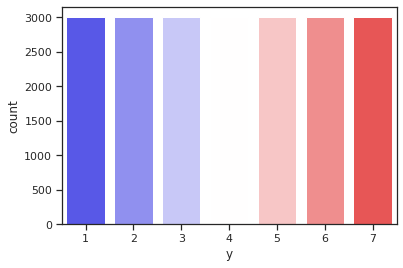

In [ ]:
sns.set(style="ticks")
f = sns.countplot(x="y", data=All_Data, palette="bwr")
plt.show()

In [ ]:
All_Data['y'].value_counts() # count values for each class 

6    3000
3    3000
1    3000
2    3000
4    3000
5    3000
7    3000
Name: y, dtype: int64

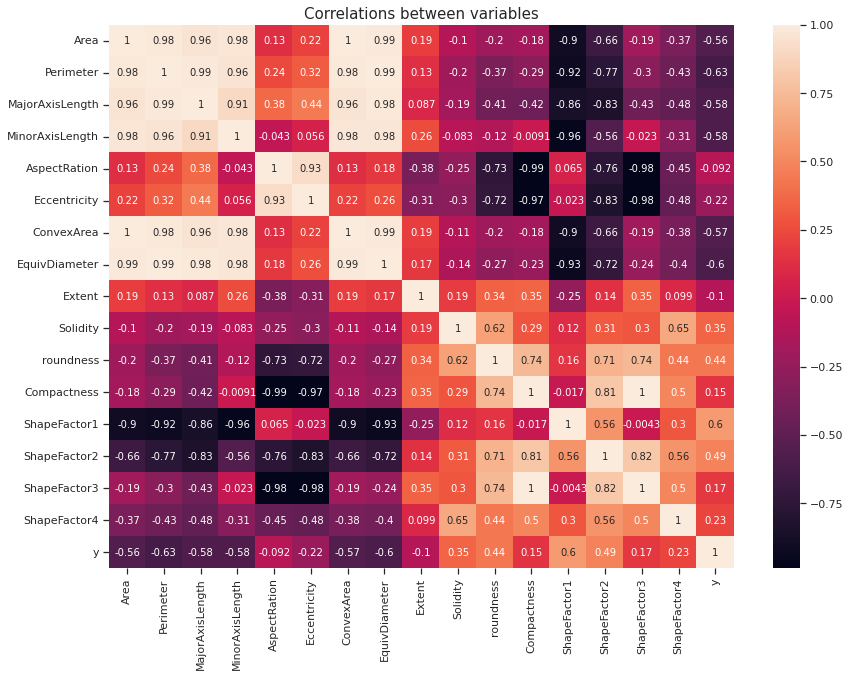

In [ ]:
# heatmape to see corelation 
plt.figure(figsize = (14,10))
s = sns.heatmap(All_Data.corr(),annot = True)
s.set_xticklabels(s.get_xticklabels())
s.set_yticklabels(s.get_yticklabels())
plt.title("Correlations between variables", size = 15)
plt.show()

In [ ]:
X = All_Data.drop(['y'], axis = 1)
Y = All_Data['y']
X = pd.get_dummies(X, prefix_sep='_')
# Y = LabelEncoder().fit_transform(Y)

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
scaled_X = pd.DataFrame(scaler.transform(X), columns = X.columns)

In [ ]:
scaled_X

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,-0.311852,-0.179164,0.090161,-0.505850,1.357927,1.089761,-0.293876,-0.235777,0.656170,-3.213048,-0.606860,-1.384960,0.524779,-0.772275,-1.339931,-4.255804
1,2.469215,2.212461,2.250619,2.282460,0.149915,0.375344,2.470722,2.324905,1.261113,-0.179539,0.177136,-0.273900,-1.923321,-1.257928,-0.306178,-0.662956
2,-0.579436,-0.726440,-0.890426,-0.254083,-1.491725,-1.854520,-0.583874,-0.605203,0.631892,0.966623,1.469620,1.696537,0.027777,1.447979,1.752831,1.075432
3,2.519098,2.267709,2.162174,2.435737,-0.137569,0.139709,2.505513,2.360364,0.968874,0.622068,0.065044,0.019614,-1.993638,-1.179410,-0.018815,-0.165630
4,-0.488311,-0.310594,0.003028,-0.911661,2.410593,1.464625,-0.487642,-0.474048,-2.717576,-0.194677,-1.592480,-1.983316,1.217163,-0.900423,-1.856873,0.135786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,-0.066045,0.085736,0.089427,0.007219,0.156128,0.388867,-0.067874,0.068616,-0.100572,0.195276,-0.292141,-0.234634,-0.311293,-0.416366,-0.269432,1.118095
20996,-0.428512,-0.328724,-0.466030,-0.313502,-0.417872,-0.134897,-0.426711,-0.391172,0.906083,-0.416008,-0.652319,0.333697,0.122933,0.241411,0.296489,0.548825
20997,0.469165,0.610028,0.688709,0.560679,0.284644,0.485106,0.460549,0.652180,0.968151,0.846541,0.071927,-0.385173,-0.864181,-0.782776,-0.415249,0.042268
20998,-0.701410,-0.856690,-0.833350,-0.727772,-0.433594,-0.151864,-0.703749,-0.791207,1.060618,0.572820,0.908757,0.352807,0.819816,0.684071,0.315942,0.616528


In [ ]:
print(Y.unique())

[5 2 6 1 4 7 3]


# **Feature** **Extraction**

# `First Apply **PCA** `

In [ ]:
pca = PCA()
X_train_pca = pca.fit_transform(scaled_X)

In [ ]:
pca.explained_variance_ratio_

array([5.30462491e-01, 2.94276062e-01, 7.82326985e-02, 4.82012573e-02,
       3.04982549e-02, 8.61381592e-03, 6.20634267e-03, 2.86561591e-03,
       5.06884817e-04, 6.71885668e-05, 5.02524857e-05, 1.18269150e-05,
       6.67757301e-06, 4.40269573e-07, 1.08491546e-07, 8.34339907e-08])

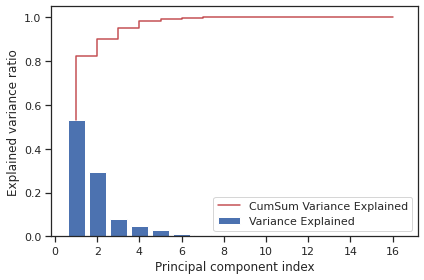

In [ ]:
plt.bar(range(1,17),pca.explained_variance_ratio_,label='Variance Explained')
plt.step(range(1,17),np.cumsum(pca.explained_variance_ratio_),label='CumSum Variance Explained',c='r')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
pca=PCA(n_components=5) # from 5 to upove give the same result 
X_train_pca=pca.fit_transform(scaled_X)
# X_test_pca=pca.transform(X)

In [ ]:
X_train_pca

array([[-4.16796101, -1.98185157, -0.18193188, -0.42240937,  0.25800864],
       [-3.0665788 ,  0.05303899, -0.12350502,  0.5140805 , -0.24715362],
       [-4.1400442 , -1.82835638, -0.33550384,  0.17698952,  0.13190442],
       ...,
       [-1.25520771,  0.43838634, -0.04487604,  1.11041199, -0.16000813],
       [-2.94808711, -0.34367815, -0.6350781 ,  0.96531928,  0.185928  ],
       [ 0.44597707, -0.22234645,  0.82624995,  0.66446169, -1.98597558]])

In [ ]:
# print(confusion_matrix(y_test,svm_PCA_predict_test))
# print(classification_report(y_test,svm_PCA_predict_test))

In [ ]:
#calculate F1 score
# print(f'F1 score : {f1_score(y_test, svm_PCA_predict_test,average="macro")} ')

F1 score : 0.9392068336891929 


In [ ]:
y_list = Y.to_numpy() # very important
# y_list
pca = PCA(n_components=7)
X_pca = pca.fit_transform(scaled_X)
PCA_X = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7'])
PCA_df = PCA_X.copy()
# PCA_df = pd.concat([PCA_df,Y], axis = 1)
# PCA_df['y'] = LabelEncoder().fit_transform(PCA_df['y'])
PCA_df['y'] = y_list
PCA_X.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,2.162157,3.351912,3.593514,2.305390,1.773602,-0.086856,0.042109
1,5.498259,-3.062295,-0.370709,0.609663,0.222796,0.532734,0.068134
2,-3.668092,-2.682253,-0.083381,-0.091551,0.006868,-0.288606,0.060141
3,5.153193,-3.613742,-0.975238,0.050826,0.012394,0.267010,0.195499
4,1.135927,4.881406,-0.923511,-1.690950,-0.063983,0.195329,0.500177


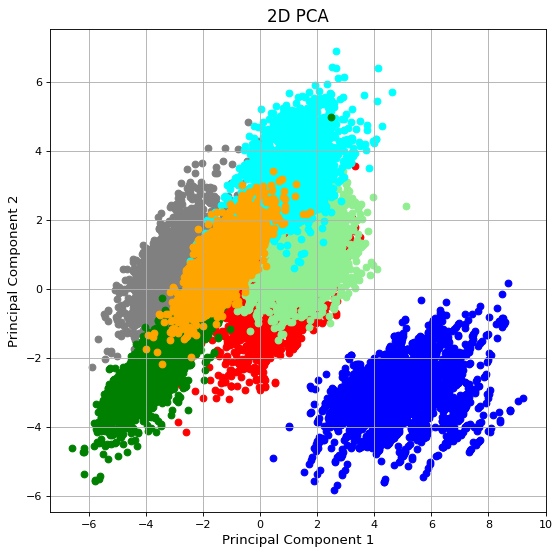

In [ ]:
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

classes = [ 1, 2, 3, 4, 5, 6,7]
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan','green','orange')
for clas, color in zip(classes, colors):
    plt.scatter(PCA_df.loc[PCA_df['y'] == clas, 'PC1'], PCA_df.loc[PCA_df['y'] == clas, 'PC2'], c = color)
    
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('2D PCA', fontsize = 15)
plt.grid()

# Now let's tray k fold cross validation with svm to see the effect

In [ ]:
from numpy.random.mtrand import rand
fold_no = 1
accuracy = []
f1score = []

classifier = SVC(C=1, gamma=1,random_state=42)  # when decrease gamma to 10 overfit val accuracey decrease and train accuracy increase
skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(PCA_X, Y):
  index = test_index
  x_train, x_test  = PCA_X.iloc[train_index], PCA_X.iloc[test_index]
  y_train, y_test  = Y.iloc[train_index], Y.iloc[test_index]
  classifier.fit(x_train,y_train)
  predictions = classifier.predict(x_test)
  score_train = classifier.score(x_train, y_train)
  score_val = accuracy_score(y_test,predictions)
  fscore = f1_score(y_test, predictions, average="micro")
  print(f'Fold { str(fold_no)} Accuracy Train :{score_train}')
  print(f'Fold { str(fold_no)} Accuracy Val :{score_val}   F1 score : {fscore}')
  print(confusion_matrix(y_test,predictions))
  print(classification_report(y_test,predictions))
  accuracy.append(score_val)
  f1score.append(fscore)
  fold_no += 1

print(accuracy)

Fold 1 Accuracy Train :0.9661904761904762
Fold 1 Accuracy Val :0.95   F1 score : 0.9500000000000001
[[581   0   9   0   2   2   6]
 [  0 600   0   0   0   0   0]
 [ 11   0 581   0   5   0   3]
 [  0   0   0 520   6  11  63]
 [  0   0   5   1 588   0   6]
 [  1   0   0   9   1 581   8]
 [  3   0   1  38  14   5 539]]
              precision    recall  f1-score   support

           1       0.97      0.97      0.97       600
           2       1.00      1.00      1.00       600
           3       0.97      0.97      0.97       600
           4       0.92      0.87      0.89       600
           5       0.95      0.98      0.97       600
           6       0.97      0.97      0.97       600
           7       0.86      0.90      0.88       600

    accuracy                           0.95      4200
   macro avg       0.95      0.95      0.95      4200
weighted avg       0.95      0.95      0.95      4200

Fold 2 Accuracy Train :0.9650595238095238
Fold 2 Accuracy Val :0.950952380952381   F1

In [ ]:
print(np.array(accuracy).mean())
print(np.array(f1score).mean())

0.9524285714285714
0.9524285714285714


In [ ]:

!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/support_vector_machines


Cloning into 'machine_learning_1'...
remote: Enumerating objects: 199, done.
remote: Counting objects: 100% (199/199), done.
remote: Compressing objects: 100% (144/144), done.
remote: Total 199 (delta 93), reused 158 (delta 52), pack-reused 0
Receiving objects: 100% (199/199), 34.12 MiB | 23.26 MiB/s, done.
Resolving deltas: 100% (93/93), done.
/content/machine_learning_1/support_vector_machines


In [ ]:
import utils

svm_linear = SVC().fit(PCA_X[['PC1','PC2']], Y)
# svm_linear.fit(features, labels)

print("Accuracy:", svm_linear.score(PCA_X[['PC1','PC2']], Y))
# utils.plot_model(PCA_X[['PC1','PC2']], Y, svm_linear) infinit loop

Accuracy: 0.8722380952380953


In [ ]:
print(Y.iloc[index].value_counts())

4    600
2    600
7    600
6    600
1    600
3    600
5    600
Name: y, dtype: int64


# Save All Data after Featuer Extraction

In [ ]:
PCA_df = shuffle(PCA_df)
PCA_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,y
16133,3.349627,-2.679072,-0.855331,-1.165639,-0.159375,0.060461,-0.278785,2
887,-2.032903,1.289354,0.287279,-0.499661,-0.220216,0.685885,-0.274172,4
2768,0.189841,0.150094,1.542703,-1.029778,-1.555133,0.416420,-0.490796,1
7077,1.652143,3.943755,-0.954564,1.845036,-0.083916,-0.383329,0.879460,5
8493,-0.016674,-1.099043,1.442072,0.368847,-1.585055,-0.524910,0.145085,1


In [ ]:
# save Data after featuer extraction pca beacuse Pca most high accuracy
PCA_df.to_csv('/content/drive/MyDrive/Dry Beans Classification Competition/Dataset/Features Extraction/Train/All_Data_FeatuerExtraction',index=False)

In [ ]:
read = pd.read_csv('/content/drive/MyDrive/Dry Beans Classification Competition/Dataset/Features Extraction/Train/All_Data_FeatuerExtraction')

In [ ]:
read.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,y
0,3.349627,-2.679072,-0.855331,-1.165639,-0.159375,0.060461,-0.278785,2
1,-2.032903,1.289354,0.287279,-0.499661,-0.220216,0.685885,-0.274172,4
2,0.189841,0.150094,1.542703,-1.029778,-1.555133,0.416420,-0.490796,1
3,1.652143,3.943755,-0.954564,1.845036,-0.083916,-0.383329,0.879460,5
4,-0.016674,-1.099043,1.442072,0.368847,-1.585055,-0.524910,0.145085,1
5,-0.630742,1.450355,-1.375522,1.264573,-0.392567,0.134101,-0.149892,7
6,-2.530228,0.756238,-1.560968,1.590097,0.075762,0.344565,-0.026819,4
7,-0.912937,0.087882,-0.769115,-0.635010,0.095736,-0.241141,-0.396144,7
8,-0.569815,0.979989,-0.601353,1.218604,-0.412964,-0.087501,-0.106358,7
9,-1.501992,1.724351,-0.062132,-0.940279,0.329417,0.239386,-0.169221,4


# `Scond Apply Linear Discriminant Analysis (**LDA**)`

In [ ]:
#https://stats.stackexchange.com/questions/368566/why-with-two-classes-lda-gives-only-one-dimension

lda  = LDA(n_components=6) 
X_train_lda = lda.fit_transform(scaled_X,Y)
# X_test_lda  = lda.transform(X_test)

In [ ]:
X_lda = pd.DataFrame(X_train_lda,columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6'])
X_lda

,PC1,PC2,PC3,PC4,PC5,PC6
0,4.624503,-3.829379,0.402010,-2.909151,-0.277272,0.621800
1,4.031657,-3.051533,-1.963833,1.633727,0.310163,0.449935
2,4.605300,-3.805378,-0.090024,-2.153166,-0.252497,0.811238
3,2.089502,4.964024,-0.540708,-1.450233,-1.016782,0.346487
4,1.049127,0.400806,2.030516,1.975944,0.185404,-0.770524
...,...,...,...,...,...,...
20995,4.153063,-2.450017,-2.288296,1.656466,-0.005108,-0.293707
20996,1.284844,0.421107,2.258522,2.258077,0.365036,-0.453804
20997,3.119556,-0.481877,-0.277485,1.894411,-0.776326,-1.246615
20998,4.262775,-2.759886,-1.719156,1.231553,-0.310142,-0.434319


# Apply SVM to see my results on LDA

In [ ]:
fold_no = 1
accuracy = []
classifier = SVC(C=1.0,kernel='rbf')
skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(X_lda, Y):
  x_train, x_test  = X_lda.iloc[train_index], X_lda.iloc[test_index]
  y_train, y_test  = Y.iloc[train_index], Y.iloc[test_index]
  classifier.fit(x_train,y_train)
  predictions = classifier.predict(x_test)
  score_train = classifier.score(x_train, y_train)
  score_val = accuracy_score(y_test,predictions)
  print(f'Fold { str(fold_no)} Accuracy Train :{score_train}')
  print(f'Fold { str(fold_no)} Accuracy Val :{score_val} F1 score : {f1_score(y_test, predictions, average="macro")}')
  accuracy.append(score_val)
  fold_no += 1

print(accuracy)

Fold 1 Accuracy Train :0.9461309523809524
Fold 1 Accuracy Val :0.9466666666666667 F1 score : 0.9468149588921018
Fold 2 Accuracy Train :0.9461904761904761
Fold 2 Accuracy Val :0.9454761904761905 F1 score : 0.9455476618416505
Fold 3 Accuracy Train :0.9448214285714286
Fold 3 Accuracy Val :0.9485714285714286 F1 score : 0.9487415312640162
Fold 4 Accuracy Train :0.9468452380952381
Fold 4 Accuracy Val :0.9423809523809524 F1 score : 0.9424328691409654
Fold 5 Accuracy Train :0.9469047619047619
Fold 5 Accuracy Val :0.9433333333333334 F1 score : 0.9439064185846553
[0.9466666666666667, 0.9454761904761905, 0.9485714285714286, 0.9423809523809524, 0.9433333333333334]


In [ ]:
print(np.array(accuracy).mean())

0.9452857142857143


In [ ]:
# print('SVC accuracy on Train Data->',svc.score(X_train_lda, y_train))
# print('SVC accuracy on Test Data->',svc.score(X_test_lda, y_test))

In [ ]:
# svc_lda_pre_test = svc.predict(X_test_lda)

In [ ]:
# print(confusion_matrix(y_test,svc_lda_pre_test))
# print(classification_report(y_test,svc_lda_pre_test))

[[1129    0   50    0    2    6   13]
 [   0 1200    0    0    0    0    0]
 [  22    0 1149    0   14    2   13]
 [   3    0    0 1085    4   23   85]
 [   1    0   17    5 1158    0   19]
 [   7    0    0    7    0 1158   28]
 [   6    0    7   90   12   16 1069]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1200
           1       1.00      1.00      1.00      1200
           2       0.94      0.96      0.95      1200
           3       0.91      0.90      0.91      1200
           4       0.97      0.96      0.97      1200
           5       0.96      0.96      0.96      1200
           6       0.87      0.89      0.88      1200

    accuracy                           0.95      8400
   macro avg       0.95      0.95      0.95      8400
weighted avg       0.95      0.95      0.95      8400



In [ ]:
# from sklearn.metrics import f1_score
# #calculate F1 score
# print(f'F1 score : {f1_score(y_test, svc_lda_pre_test,average="macro")} ')

F1 score : 0.9462862338712199 


# Appy Feauter Extraction on each Fold As Ya want

In [ ]:
def FeatuerExtr(path):
  # Read Data
  All_Data = pd.read_csv(path)
  # suffle Data 
  All_Data = shuffle(All_Data)
  All_Data.drop(['ID'],axis = 1,inplace=True)
  X = All_Data.drop(['y'], axis = 1)
  Y = All_Data['y'].astype(int)
  X = pd.get_dummies(X, prefix_sep='_')
  scaler = StandardScaler()
  scaler.fit(X)
  scaled_X = pd.DataFrame(scaler.transform(X), columns = X.columns)
  y_list = Y.to_numpy() # very important
  pca = PCA(n_components=7)
  X_pca = pca.fit_transform(scaled_X)
  PCA_X = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7'])
  PCA_df = PCA_X.copy()
  PCA_df['y'] = y_list
  PCA_df = shuffle(PCA_df)
  return PCA_df

In [ ]:
# Train Folds 
for i in range(1,6):
  path = f'/content/drive/MyDrive/Dry Beans Classification Competition/Dataset/Preprocessing/Train/trial_{i}_train.csv'
  F_df = FeatuerExtr(path)
  F_df.to_csv(f'/content/drive/MyDrive/Dry Beans Classification Competition/Dataset/Features Extraction/Train/trial_{i}_train_PCA_FE.csv',index=False)

In [ ]:
# test Folds 
for i in range(1,6):
  path = f'/content/drive/MyDrive/Dry Beans Classification Competition/Dataset/Preprocessing/Validation/trial_{i}_test.csv'
  F_df = FeatuerExtr(path)
  F_df.to_csv(f'/content/drive/MyDrive/Dry Beans Classification Competition/Dataset/Features Extraction/Validation/trial_{i}_test_PCA_FE.csv',index=False)

In [ ]:
# Check 
read = pd.read_csv('/content/drive/MyDrive/Dry Beans Classification Competition/Dataset/Features Extraction/Validation/trial_1_test_PCA_FE.csv')
read.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,y
0,-3.320655,0.121956,-0.296775,-0.470905,0.449987,0.321281,0.028884,4
1,-1.874928,0.121224,-0.953517,0.887637,-0.008956,0.066470,-0.253590,7
2,-1.658234,0.143145,-1.403627,1.080887,0.136527,-0.005556,-0.312233,7
3,5.926745,-3.465860,-0.973157,-0.543101,-0.301654,0.701342,0.326382,2
4,0.184669,-1.783307,0.036714,0.187408,-0.771348,-0.225080,-0.417954,1
5,5.769597,-2.810776,-1.094285,0.616351,-0.269599,0.387566,0.378654,2
6,1.103936,-0.600414,-0.033776,-0.338961,-1.296627,-0.252988,-0.207704,1
7,0.828439,4.304774,-0.749025,-1.961331,0.308833,0.128237,0.254292,5
8,-1.660420,0.080891,0.406624,0.329558,-0.715418,0.358725,-0.289635,7
9,-0.971136,0.277242,1.060871,0.342284,-1.486724,0.077894,-0.017576,1


In [ ]:
print(read['y'].unique())
read['y'].value_counts()

[4 7 2 1 5 6 3]


4    600
7    600
2    600
1    600
5    600
6    600
3    600
Name: y, dtype: int64